In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from PIL import Image

The following piece of code defines the iteration map 

$$\phi(z)=z-\frac{z^3-1}{3z^2}$$

of the Newton-Raphson method for the equation $z^3-1=0$. In addition, the three roots are specified, and a color for each of the roots is chosen.

In [2]:
#Newton-Raphson iteration for z**3-1=0
def phi(z):
    z=complex(z)
    return z+(1/(z*z)-z)/3
#cubic roots of 1
zz=[1,complex(-.5,.5*np.sqrt(3)),complex(-.5,-.5*np.sqrt(3))]
#corresponding colors
cc=[[1,0,0],[0,1,0],[0,0,1]]

We consider the rectangle $(x_{\textrm{min}},x_{\textrm{max}})\times(y_{\textrm{min}},y_{\textrm{max}})$ in the $z$-plane, and superimpose on it a grid of size $\texttt{imgx}\times\texttt{imgy}$. From each grid point, we start the Newton-Raphson iteration, and depending on the root it converges to, we color the point. Convergence is deemed to occur if the cuurent iterand is within $\varepsilon$ distance of a root. In case the iteration takes too long (i.e., $\texttt{iteration number} > \texttt{maxit}$), or division by zero occurs, we leave the point uncolored (black). We also shade the colors in such a way that darker regions correspond to points that need more iterations to converge to a root.

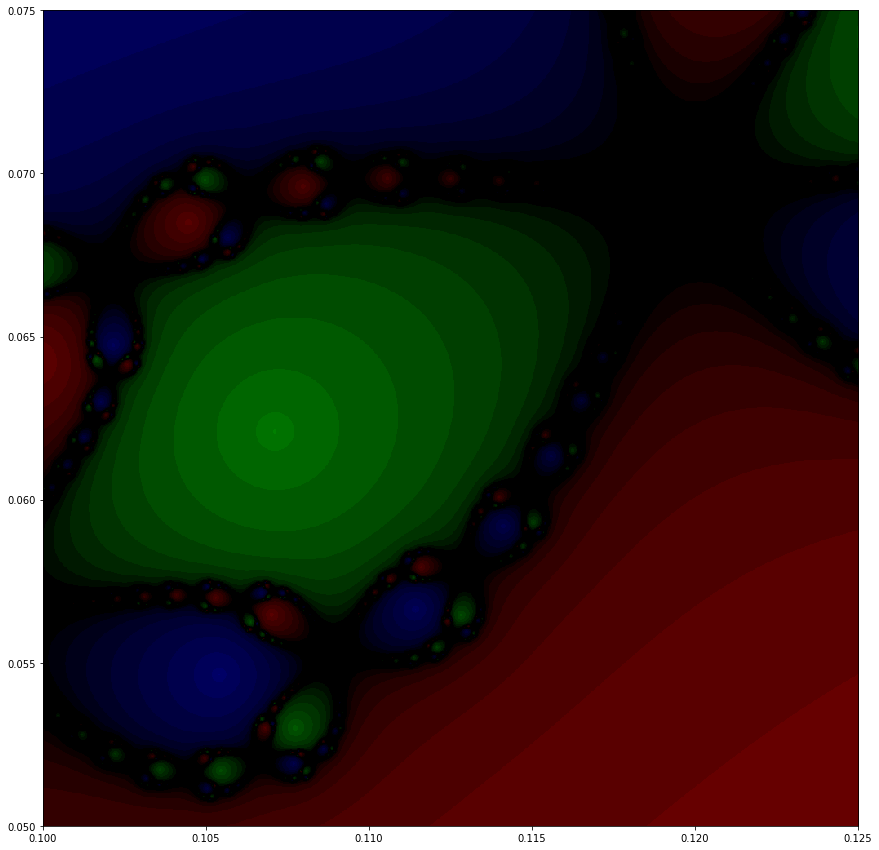

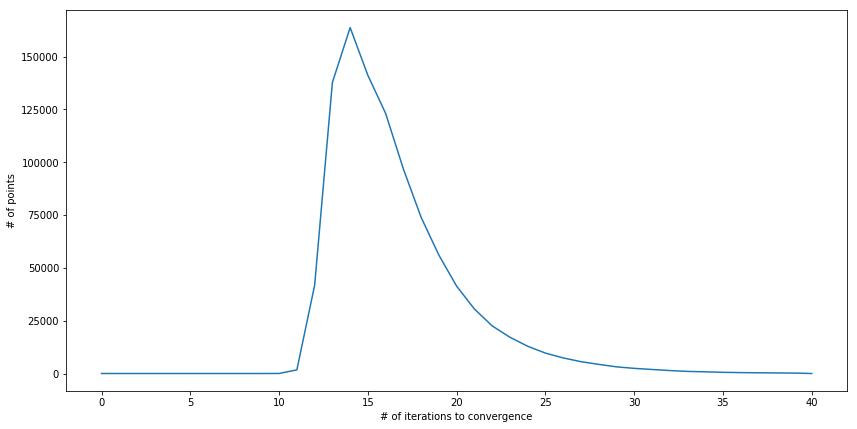

In [3]:
xmin = 0.1
xmax = 0.125
ymin = 0.05
ymax = 0.075
eps = .0001
maxit = 40
imgx = 1000
imgy = 1000
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            z=phi(z0)
            con=False
            for l in range(len(zz)):
                if abs(z-zz[l])<eps:
                    con=True
                    break
            if(con):
                img[i,j]=[np.maximum(0,np.minimum(1,(sit-k)*f*c)) for c in cc[l]]
                h[k]+=1
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('newt.png', img)
plt.figure(figsize=(14,7))
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

QUESTION 1:
There is a large monochromatic region around each of the root because that close each root, the convergence to this root is fast.

QUESTION 2:
I changed the region to zoom on the boundary, chose one different color, and increased the resolution.
We obtain a nice fractal.
Now, the boundary of the starting region has a fractal nature, as any point on the boundary does not converge directly to the flat region containing the root. The nature of the fractal is caused by the three regions intersecting, and it gets replicated on all the boundary.